In [6]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Load demo data

In [13]:
import demo_utils

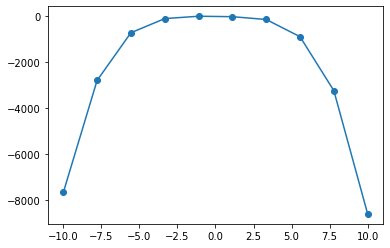

In [16]:
_, x, y = demo_utils.make_sample_data(seed=1, noise=5)
plt.plot(x, y, '-o')

Try different polinomials

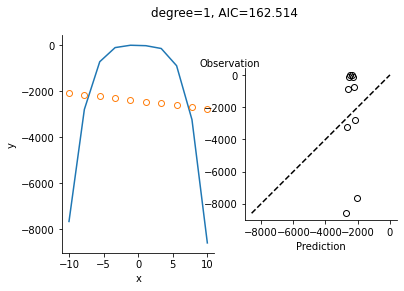

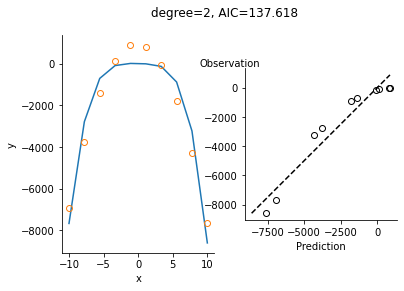

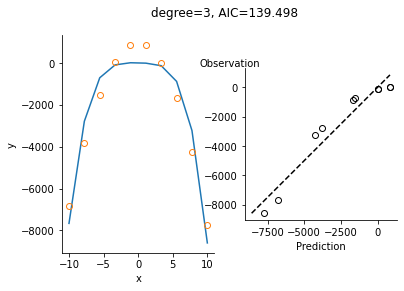

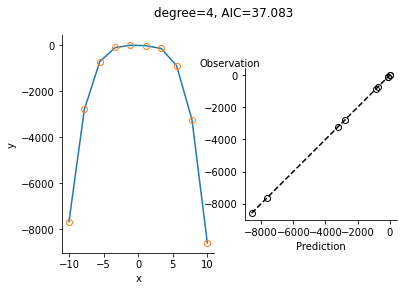

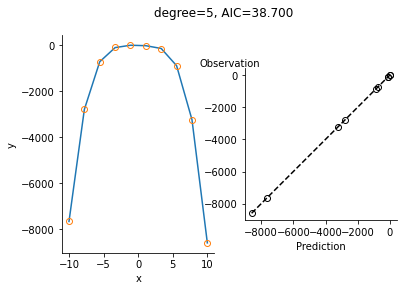

In [17]:
aic_values = []
for degree in range(1, 6):
    p = np.polyfit(x, y, degree)
    pred = np.polyval(p, x)
    aic = demo_utils.aic(y, pred, n_params=degree)
    aic_values.append(aic)
    title = f'{degree=}, AIC={aic:.3f}'
    fig, axes = demo_utils.plot_summary(x=x, y_obs=y, y_pred=pred)
    fig.suptitle(title)

Let's use Akaike Information Criterion (AIC) to select the optimal degree

Text(0.5, 0.98, 'Optimal degree of 4 leads to AIC=37.083')

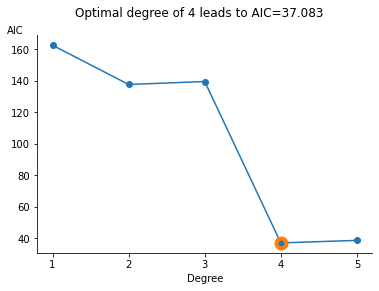

In [18]:
fig, ax = plt.subplots()
degrees = (np.arange(len(aic_values)) + 1).astype(int)
ax.plot(degrees, aic_values, '-o')
ax.set_xlabel('Degree')
ax.set_xticks(degrees)
ax.set_ylabel('AIC', y=1, rotation=0, ha='left', va='bottom')
optimal_degree = np.argmin(aic_values[0:5]) + 1
ax.plot(optimal_degree, aic_values[optimal_degree-1], 'o', mec='C1', mfc='None', ms=10, mew=4)
sns.despine(ax=ax)
fig.suptitle(f'Optimal degree of {optimal_degree} leads to AIC={aic_values[optimal_degree-1]:.3f}')

Build a model and do some extrapolation

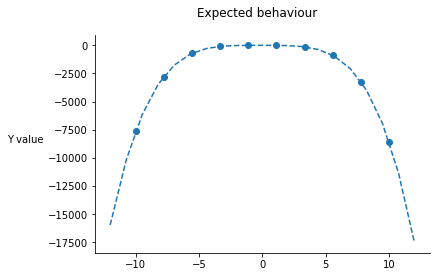

In [19]:
x_range = max(x) - min(x)
x_new = np.linspace(min(x) - x_range / 10, max(x) + x_range/10, num=len(x) * 2)
p = np.polyfit(x, y, optimal_degree)
y_new = np.polyval(p, x_new)
fig, ax = plt.subplots()
ax.plot(x_new, y_new, '--', color='C0')
ax.plot(x, y, 'o', color='C0')
ax.set_ylabel('Y value', rotation=0, ha='right')
sns.despine(ax=ax)
fig.suptitle('Expected behaviour')
fig.savefig('fig1.png')
!open fig1.png